In [1]:
from advisor_backend.interface import Interface
import matplotlib.pyplot as plt

# Timeline调优分析

## 1. Timeline分析的数据准备
我们当前支持Ascend PyTorch Profiler方式采集后的ascend_pt目录，并支持单独分析ascend_pt/ASCEND_PROFILER_OUTPUT目录下的trace_view.json文件。

## 2. Timeline分析解决的问题
当前的功能：1) 识别当前可选择的NPU亲和优化器；2) 分析算子调度瓶颈；

In [3]:
# EDIT THE PROFILING DATA PATH
timeline_path = "[YOUR PATH]"
interface = Interface(timeline_path)

### 1）亲和优化器识别

In [4]:
dataset = interface.get_data('timeline', 'optimizer')
# 打印当前使用的优化器
data = dataset.get('data')
print(data)

# 如果使用了原生优化器，则打印优化建议
advice = dataset.get('advice')
print(advice)

[INFO] Start to analyse the target file: [YOUR PATH]
['Optimizer.step#AdamW.step']
You can choose torch_npu.optim.NpuFusedAdamW to replace the current Optimizer: Optimizer.step#AdamW.step.


### 2）算子调度分析


[INFO] Start to analyse the target file: [YOUR PATH]


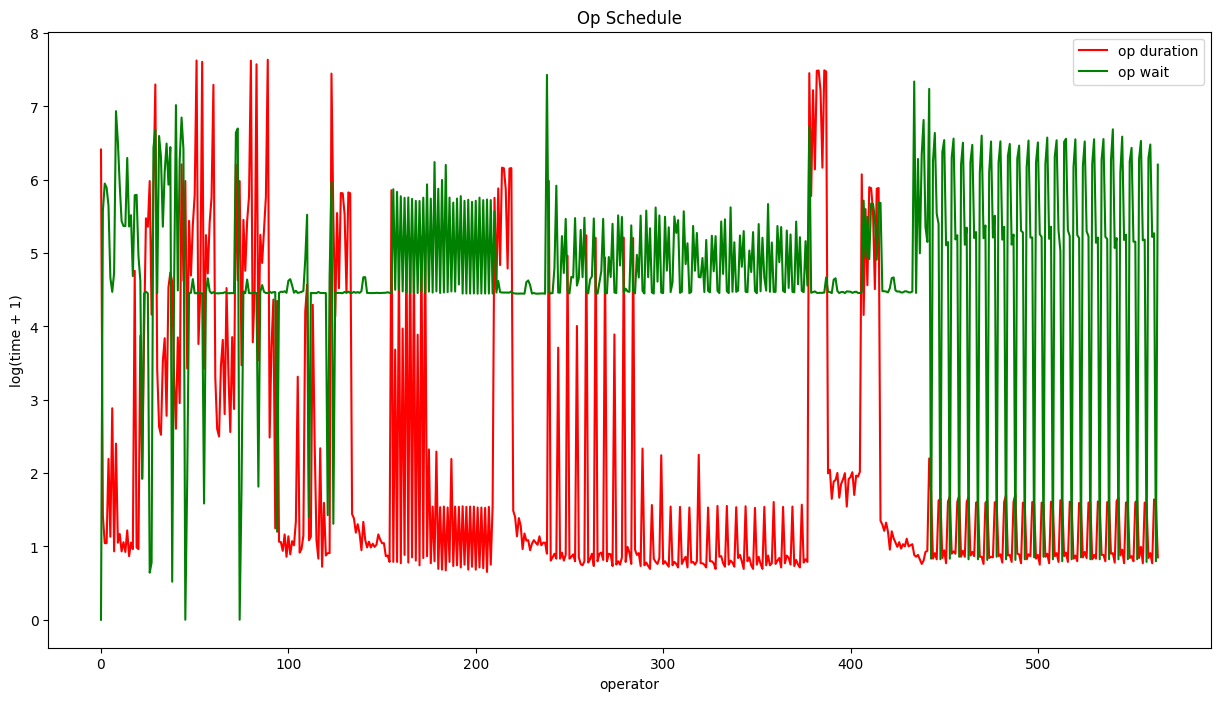

NPU Utilication: 71.33%, NPU Free Utilization: 28.67%.
Device synchronize 5 times, try to reduce synchronization statements to alleviate the bottleneck of operator delivery.
There are too many small operators, you can increase the batch size appropriately.


In [5]:
dataset = interface.get_data('timeline', 'op_schedule')
data = dataset.get("data")
import math
op_dur = [math.log(i + 1) for i in data[0]]
op_free = [math.log(i + 1) for i in data[1]]
x = [i for i in range(len(op_dur))]
fig = plt.figure(figsize=(15, 8))
plt.plot(x, op_dur, c='r', ls='-', label='op duration')
plt.plot(x, op_free, c='g', ls='-', label='op wait')

plt.xlabel('operator')
plt.ylabel('log(time + 1)')
plt.title('Op Schedule')
plt.legend(loc='upper right')
plt.show()

print(dataset.get('bottleneck'))
print(dataset.get('advice'))